In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import pandas as pd
import geopandas as gp
import numpy as np
from matplotlib import pyplot as plt, colormaps, colors
import seaborn as sns
from exposure_matrices import load_data

root_path = Path().resolve().parents[1]
enrollment_2022_path = root_path / "data" / "enrollment_2022"
map_path = root_path / "data" / "NYS_Civil_Boundaries"
image_path = root_path / "images"

In [44]:
counties = gp.read_file(map_path / "Counties.shp")
counties["NAME"] = counties["NAME"].str.upper()
counties["NAME"] = counties["NAME"].apply(lambda x: x if x != "ST LAWRENCE" else "SAINT LAWRENCE")
data = load_data(2022)

(71853.38954500001, 813650.0947549996, 4455716.4048, 5010703.0898)

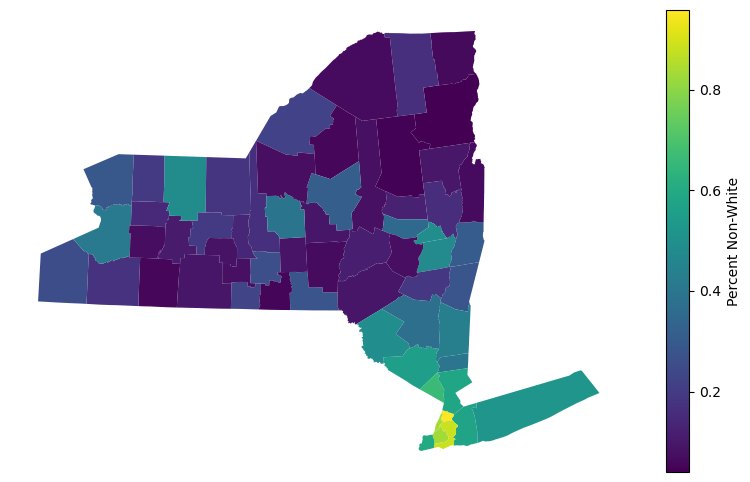

In [60]:
agg_white = data[["NUM_WHITE", "K12", "COUNTY_NAME"]].groupby("COUNTY_NAME").sum()

agg_white["PER_WHITE"] = agg_white["NUM_WHITE"] / agg_white["K12"]
agg_white["PER_NON_WHITE"] = 1 - agg_white["PER_WHITE"]

counties.merge(agg_white, left_on="NAME", right_on="COUNTY_NAME", how="outer").plot(column="PER_NON_WHITE", cmap="viridis", legend=True, figsize=(10, 6), edgecolor=None, linewidth=0.5, legend_kwds={"label": "Percent Non-White", "orientation": "vertical"})
plt.axis('off')

# merged[merged["NAME"].isna()].columns